### INSTRUCTIONS

For this assignment, you must use the AWS VM that has been assigned to you.

Read through the entire framework below once. Note the parts you need to code up.


In [1]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES
!pip install lime

In [2]:
##### DO NOT EDIT THIS CELL!!!
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications 
from tensorflow.keras import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
from lime import lime_image

# Load ResNet50 model pre-trained on ImageNet dataset
model = applications.ResNet50(weights='imagenet')

# Function to preprocess image for ResNet50
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('double') 
    return preprocess_input(img_array)

# Function to predict class probabilities using ResNet50
def predict_with_resnet50(image_path):
    preprocessed_image = preprocess_image(image_path)
    preds = model.predict(preprocessed_image)
    return decode_predictions(preds, top=3)[0]

# Load the image you want to classify
image_path = "1_frame_00.png"

# Predict class probabilities using ResNet50
preds = predict_with_resnet50(image_path)
print("ResNet50 Predictions:")
for pred in preds:
    print(pred[1], ':', pred[2])

ResNet50 Predictions:
minivan : 0.67331845
minibus : 0.08131725
limousine : 0.037948154


[[[ 40.061  15.221  20.32 ]
  [ 47.061  22.221  27.32 ]
  [-22.939 -47.779 -42.68 ]
  ...
  [ 85.061  64.221  59.32 ]
  [ 86.061  66.221  65.32 ]
  [ 87.061  67.221  66.32 ]]

 [[ 52.061  27.221  32.32 ]
  [ 47.061  22.221  27.32 ]
  [-22.939 -47.779 -42.68 ]
  ...
  [ 81.061  60.221  55.32 ]
  [ 79.061  59.221  58.32 ]
  [ 79.061  59.221  58.32 ]]

 [[ 53.061  28.221  33.32 ]
  [ 46.061  21.221  26.32 ]
  [-22.939 -47.779 -42.68 ]
  ...
  [ 90.061  69.221  64.32 ]
  [ 87.061  67.221  66.32 ]
  [ 86.061  66.221  65.32 ]]

 ...

 [[ -3.939  -5.779  10.32 ]
  [ -4.939  -6.779   9.32 ]
  [ -2.939  -7.779   9.32 ]
  ...
  [ 61.061  44.221  40.32 ]
  [ 62.061  45.221  41.32 ]
  [ 62.061  45.221  41.32 ]]

 [[ -9.939 -11.779   4.32 ]
  [ -8.939 -10.779   5.32 ]
  [ -4.939  -9.779   7.32 ]
  ...
  [ 63.061  46.221  42.32 ]
  [ 62.061  45.221  41.32 ]
  [ 62.061  45.221  41.32 ]]

 [[-13.939 -15.779   0.32 ]
  [ -9.939 -11.779   4.32 ]
  [ -7.939 -12.779   4.32 ]
  ...
  [ 62.061  45.221  41.3

  0%|          | 0/1000 [00:00<?, ?it/s]

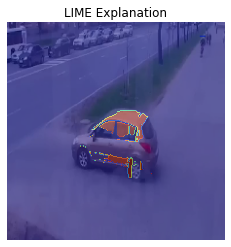

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


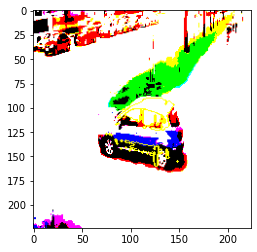

In [3]:
##### THIS IS THE ONLY CELL YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

from skimage.segmentation import mark_boundaries
# Load the image as an array, keep all the parameters at defaults
image_array = preprocess_image(image_path)
print(image_array[0])


### (1.1) ADD YOUR CODE HERE
# create Lime explainer object using LimeImageExplainer() class from lime_image.
#give it a name "explainer"
explainer = lime_image.LimeImageExplainer()

#refer to this useful documentation
##https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=limeimageexplainer#lime.lime_image.LimeImageExplainer




#Next we apply explain_instance() to explainer object created in the step above
#Call this object "explanation"

explanation = explainer.explain_instance(image_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
#Refer to this helpful documentation to learn more about explain_instance() 
#https://lime-ml.readthedocs.io/en/latest/lime.html#lime.lime_image.LimeImageExplainer.explain_instance



# Get the explanation for the top predicted class and load them into temp, mask

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)



# Plot the original image with explanations
plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


### (1.2) ADD YOUR CODE HERE
# Examine the code that was used to create temp, mask above 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
#Copy the code here and modify it to get the explanation for the top predicted class for ONLY the AREAS CONTRIBUTING to prediction
#Use this helpful link to understand better how get_image_and_mask() function works https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=get_image_and_mask#lime.lime_image.ImageExplanation.get_image_and_mask


# Plot the original image with explanations 
plt.imshow(mark_boundaries(temp, mask))




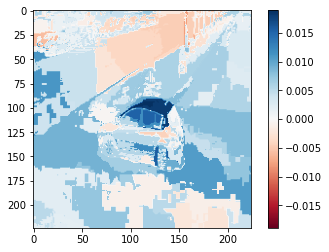

In [4]:
##### DO NOT EDIT THIS CELL!!!

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]
#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### (1.3) Reflect on the output images produced in cells 11 and 12
 #  What do green areas represent on the second image in cell 11? What does black areas represent on the second image in cell 11?
 
 The green areas in the second image of cell 11 indicate the regions that the LIME algorithm has identified as positively contributing to the model's prediction. These areas are likely features that the model found most indicative of the predicted class.
The black areas in the same image represent regions that do not have a significant contribution to the model's prediction. These could be considered neutral or irrelevant for the model's decision.

 #  How do you interpret the blue vs red colored segments in the output image of the cell 12?
###############
#PASTE YOUR ANSWER HERE (1-3 sentences summarizing the answer are enough)
The blue and red colored segments suggest the weight of each superpixel in contributing to the model's prediction. Red segments are likely to be areas that push the prediction towards the target class, while blue segments push against it. The intensity of the colors correlates with the strength of the contribution: brighter red means a stronger positive influence, and brighter blue means a stronger negative influence on the prediction.
###############